# Proyecto Final

**Descripción de la Evidencia:**
El proyecto de aprendizaje profundo consiste en la solución del problema de clasificación de prendas de vestir utilizando el conjunto de datos Fashion MNIST. Éste código implementa un modelo de red neuronal  (_visto en clase_) que resuelva el problema de clasificación.

A01285158 | Grace Aviance Silva Aróstegui

A00000000 | Christian Jaffé Alarcón Acosta

A00000000 | David Vázquez Moreno


In [1]:
pip install visualkeras #Instalamos visualkeras para visualizar la arquitectura de la red neuronal

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import math

from tensorflow import keras
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Para visualizar la arquitectura de la red neuronal
# pip install visualkeras
import visualkeras

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1) #Las imágenes de MNIST tienen una forma 28x28

#Cargamos los datos dividiendo en train y test set
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



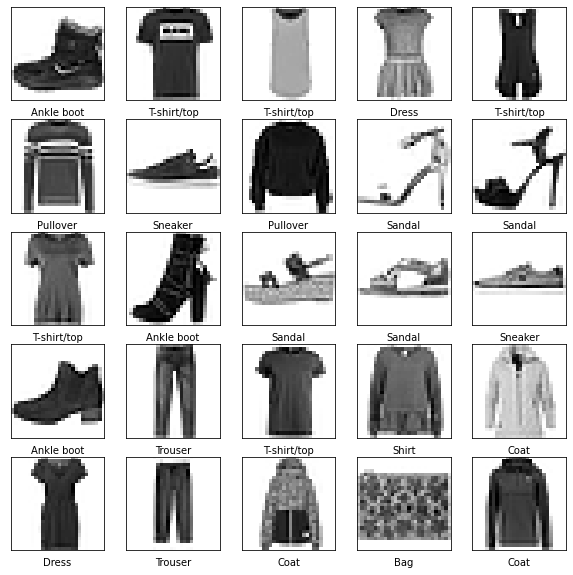

In [3]:
#Visualizamos las imágenes a clasificar
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Se trata de un conjunto de datos de 60,000 imágenes en escala de grises de 28x28 de 10 categorías de moda, con valores de pixel que varian de 0 a 255. Junto con un conjunto de prueba de 10,000 imágenes. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


In [4]:
#Forma de los datos de entrenamiento
x_train.shape
y_train.shape

#Forma de los datos de entrenamiento
x_test.shape
y_test.shape



(10000,)

## Preparamos los datos para crear el modelo

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Construimos el modelo

In [6]:
# Usamos un modelo secuencial, que es una pila lineal de capas
model = tf.keras.models.Sequential([
    # Primera capa. Tiene una capa Convolucional 2D con un kernel de tamaño 3x3 y operación Max pooling
    tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Segunda capa. Tiene una capa Convolucional 2D con un kernel de tamaño 3x3, función de activación ReLu y operación Max pooling
    tf.keras.layers.Conv2D(64, (3,3), padding='same' ,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    # Capa completamente conectada con función de activación ReLu
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # Capa dropout para evitar overfitting
    tf.keras.layers.Dropout(0.5),

    # Capa Output con función de activación Softmax
    tf.keras.layers.Dense(10, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

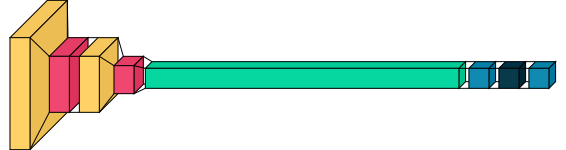

In [7]:
# Visualización 3D de la arquitectura de nuestro CNN
visualkeras.layered_view(model)

In [8]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [9]:
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=50, batch_size=128,verbose=1)

Epoch 1/50
469/469 [==============================] - 32s 66ms/step - loss: 0.5744 - accuracy: 0.7957
Epoch 2/50
469/469 [==============================] - 27s 58ms/step - loss: 0.3828 - accuracy: 0.8655
Epoch 3/50
469/469 [==============================] - 30s 64ms/step - loss: 0.3347 - accuracy: 0.8796
Epoch 4/50
469/469 [==============================] - 31s 65ms/step - loss: 0.3043 - accuracy: 0.8887
Epoch 5/50
469/469 [==============================] - 38s 80ms/step - loss: 0.2846 - accuracy: 0.8966
Epoch 6/50
469/469 [==============================] - 36s 76ms/step - loss: 0.2678 - accuracy: 0.9028
Epoch 7/50
469/469 [==============================] - 30s 65ms/step - loss: 0.2495 - accuracy: 0.9087
Epoch 8/50
469/469 [==============================] - 35s 74ms/step - loss: 0.2397 - accuracy: 0.9119
Epoch 9/50
469/469 [==============================] - 26s 55ms/step - loss: 0.2266 - accuracy: 0.9169
Epoch 10/50
469/469 [==============================] - 29s 62ms/step - loss: 0.215

In [10]:
# Evaluamos el modelo con el conjunto de datos de prueba
score = model.evaluate(x_test,  y_test, steps=math.ceil(10000/32))

# Pérdida en la prueba y Exactitud en prueba
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3883 - accuracy: 0.9225
Test loss: 0.3882904648780823
Test accuracy: 0.9225000143051147


RESULTADOS:

Obtuvimos una exactitud del 92.25%



## Predicción

313/313 [==============================] - 1s 4ms/step


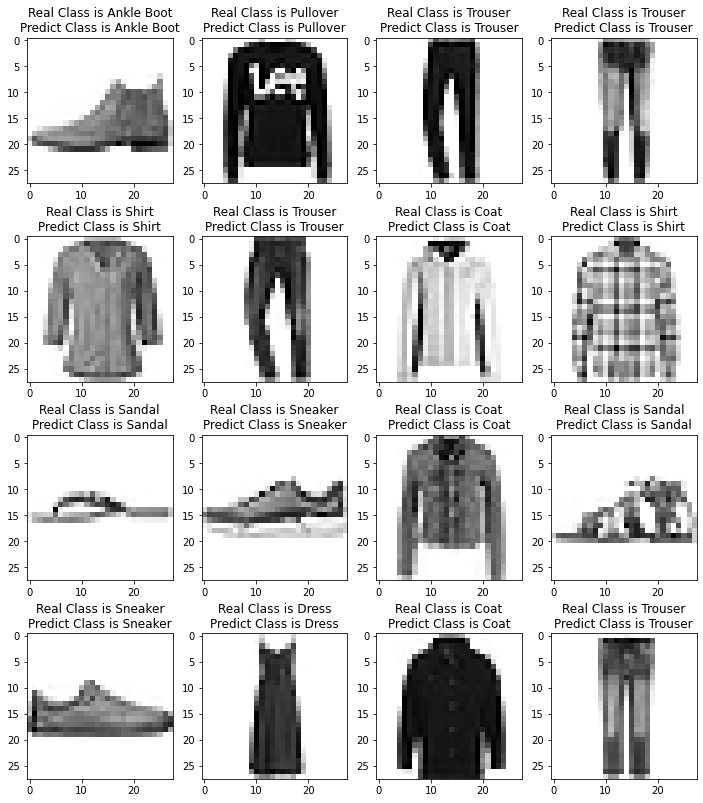

In [12]:
# Imprimimos 16 imágenes aleatorias con su clase de ropa tanto real como con predicción

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");